# Argovis explore vertical structure of ocean fields

This notebook contains some examples and is a work in progress: code will transition from here to other notebooks. Public consumers should focus on our educational notebooks, starting with [Intro to Argovis](https://github.com/argovis/demo_notebooks/blob/main/Intro_to_Argovis.ipynb).

In [1]:
from argovisHelpers import helpers as avh
import datetime #, pandas, matplotlib, scipy, numpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#from matplotlib import cm
#import cartopy.crs as ccrs

# # for the function
# import xarray as xr
# import dateutil
# from Argovis_tasks_helpers import xarray_regional_mean
# #import pandas
# # 
from Argovis_tasks_helpers import get_route,get_api_output_formatted_list, api_output_formatted_list_plot_lons_lats_map,api_output_formatted_list_plot_profiles,api_output_formatted_list_plot_map,api_output_formatted_list_plot_horizontal_and_time_ave

API_KEY='eaf7ca218b692a2e0ee0b3dc524697f43ad085e6'


/Users/dgiglio/opt/miniconda3/envs/argovis_demos/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
# API call showing collections available for each route

#### parameters the user needs to select
# user selects list of collections to use for the plot

#### for bgc variables we have gridded time mean fields
selection_params = {}
selection_params['collections']  = ['argo', 'grids/glodap',
              ] # we compare argo profiles with a gridded product

# selection_params['collections']  = ['cchdo', 'grids/glodap',
#               ] # we compare argo profiles with a gridded product

# selection_params['collections']  = ['argo', 'grids/rg09',
#               ] # we compare argo profiles with a gridded product

######## show list of variables available for each collection selected above
for icollection in selection_params['collections']:
    try:
        print(avh.query(icollection+'/vocabulary', options={'parameter': 'data'}, verbose='true',apikey=API_KEY, apiroot=get_route(icollection)) )
    except:
        print('No data parameter for vocabulary query')
    try:
        bfr = avh.query(icollection+'/vocabulary', verbose='true',apikey=API_KEY, apiroot=get_route(icollection))
        print(*bfr[0]['data'],sep=',')
    except:
        print('Needs data parameter for vocabulary query')
    
#### params varying with collection
# define name of variable of interest for each collection (first show list of all variables available for each collection)
selection_params['varnames']     = ['doxy', 'oxygen']
selection_params['varnames_qc']  = [',1', ''] # argoqc = 1 is best quality
selection_params['vartitle']     = 'Oxygen, umol/kg'

# selection_params['varnames']     = ['doxy', 'oxygen']
# selection_params['varnames_qc']  = [',2', ''] # woceqc = 2 is best quality, it corresponds to 'no problem noted' (see https://dmoserv3.whoi.edu/data_docs/GEOTRACES/EPZT/WOCE_QualityFlags.pdf)
# selection_params['vartitle']     = 'Oxygen, umol/kg'

# selection_params['varnames']     = ['salinity', 'rg09_salinity']
# selection_params['varnames_qc']  = [',1', ''] # argoqc = 1 is best quality
# selection_params['vartitle']     = 'Salinity, psu'

# define name of the variable that includes levels for each collection
selection_params['varname_levels'] = ['pressure',''] # for the gridded product, the level info is in the metadata, i.e. there is no variable in 'data' (for argo, 'pressure' is within the 'data' instead)
####

#### params varying with the region
# in this example, we will use the 'box' selection (in the next cell),
# hence we indicate here the bottom/left and top/right vertices... 
# the other option is to search in a 'polygon' and indicate the polygon
# vertices in a list (first and last vertex should be the same)
selection_params['regions']     = [
                        #[[-55.5,35.5],[-45.5,40.5]],
                        [[-145.5,45.5],[-135.5,50.5]],
                        [[-50,45],[-40,50]],
                        ]
selection_params['regions_type'] = ['box', 'box']

selection_params['regions_tag'] = ['Pacific', 'Atlantic']
####

# list of startDate and endDates of interest (note: these will not be used for glodap as glodap only provides a time mean)
selection_params['startDate']    = ['2021-01-01T00:00:00Z']
selection_params['endDate']      = ['2021-12-31T00:00:00Z']

#### other params for the api query
# platform?


#### other params
# levels for vertically integrated profiles
selection_params['interp_levels']= list(range(10,2001))[0::20]
colors = list(mcolors.TABLEAU_COLORS.keys())

https://argovis-api.colorado.edu/argo/vocabulary?parameter=data
['bbp470', 'bbp470_argoqc', 'bbp532', 'bbp532_argoqc', 'bbp700', 'bbp700_2', 'bbp700_2_argoqc', 'bbp700_argoqc', 'bisulfide', 'bisulfide_argoqc', 'cdom', 'cdom_argoqc', 'chla', 'chla_argoqc', 'chla_fluorescence', 'chla_fluorescence_argoqc', 'cndc', 'cndc_argoqc', 'cp660', 'cp660_argoqc', 'down_irradiance380', 'down_irradiance380_argoqc', 'down_irradiance412', 'down_irradiance412_argoqc', 'down_irradiance443', 'down_irradiance443_argoqc', 'down_irradiance490', 'down_irradiance490_argoqc', 'down_irradiance555', 'down_irradiance555_argoqc', 'down_irradiance665', 'down_irradiance665_argoqc', 'down_irradiance670', 'down_irradiance670_argoqc', 'downwelling_par', 'downwelling_par_argoqc', 'doxy', 'doxy2', 'doxy2_argoqc', 'doxy3', 'doxy3_argoqc', 'doxy_argoqc', 'nitrate', 'nitrate_argoqc', 'ph_in_situ_total', 'ph_in_situ_total_argoqc', 'pressure', 'pressure_argoqc', 'salinity', 'salinity_argoqc', 'salinity_sfile', 'salinity_sfile_

In [3]:
api_output_formatted_list = get_api_output_formatted_list(selection_params=selection_params,API_KEY=API_KEY)

>>>>>>>>> argo doxy, Pacific 2021-01-01 to 2021-12-31
https://argovis-api.colorado.edu/argo?data=doxy,1&box=[[-145.5,+45.5],+[-135.5,+50.5]]&startDate=2021-01-01T00:00:00.000000Z&endDate=2021-12-31T00:00:00.000000Z
>>>>>>>>> argo doxy, Atlantic 2021-01-01 to 2021-12-31
https://argovis-api.colorado.edu/argo?data=doxy,1&box=[[-50,+45],+[-40,+50]]&startDate=2021-01-01T00:00:00.000000Z&endDate=2021-12-31T00:00:00.000000Z
>>>>>>>>> grids/glodap oxygen, Pacific 2021-01-01 to 2021-12-31
https://argovis-api.colorado.edu/grids/glodap?data=oxygen&box=[[-145.5,+45.5],+[-135.5,+50.5]]&startDate=0001-01-01T00:00:00.000000Z&endDate=0001-01-02T00:00:00.000000Z
https://argovis-api.colorado.edu/grids/meta?id=glodapv2.2016b
>>>>>>>>> grids/glodap oxygen, Atlantic 2021-01-01 to 2021-12-31
https://argovis-api.colorado.edu/grids/glodap?data=oxygen&box=[[-50,+45],+[-40,+50]]&startDate=0001-01-01T00:00:00.000000Z&endDate=0001-01-02T00:00:00.000000Z
https://argovis-api.colorado.edu/grids/meta?id=glodapv2.2016

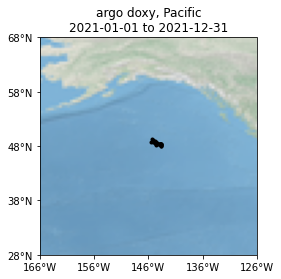

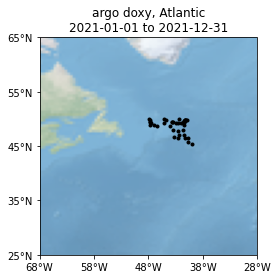

In [4]:
# plot map of lons and lats for data that are not gridded
api_output_formatted_list_plot_lons_lats_map(api_output_formatted_list)      

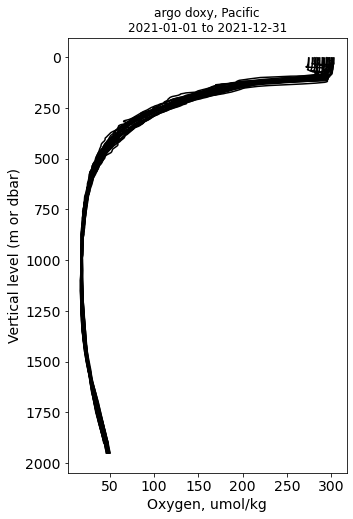

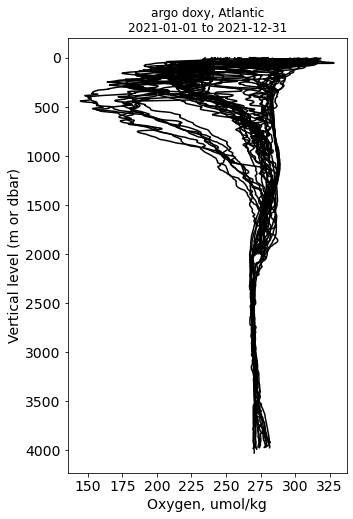

In [5]:
# plot the profiles shown above
api_output_formatted_list_plot_profiles(api_output_formatted_list)

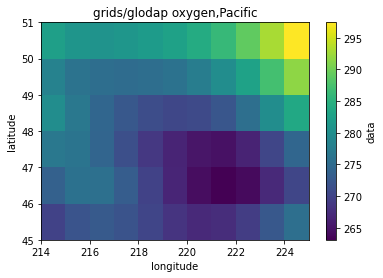

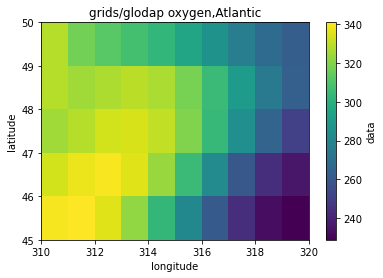

In [6]:
# plot map at one level and time
api_output_formatted_list_plot_map(api_output_formatted_list,ilev=0,itime=0)  
               

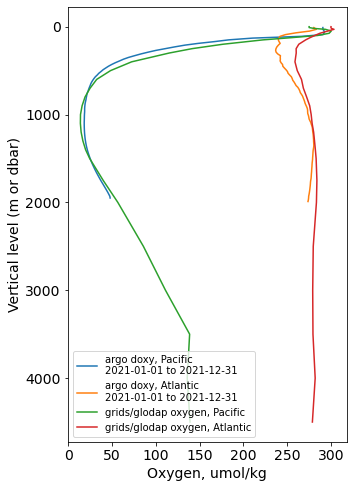

In [7]:
# plot horizontal and time average
api_output_formatted_list_plot_horizontal_and_time_ave(api_output_formatted_list,colors)  


In [ ]:
# line plots for all the points in the xar (using values and flatten?); draw the shape of interest in the maps showing profiles?

In [ ]:
inprogress

In [ ]:
#https://sites.google.com/view/paztronomer/blog/basic/python-colors
month_groups_cols= ['dodgerblue', 'violet', 'orangered', 'gold']
month_groups     = [[12, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]
month_groups_tags= ['DJF', 'MAM', 'JJA', 'SON']
profiles_in_regions_and_horiz_ave_plot1d_all_col_by_monthgroup(data_reg=data_reg,month_groups=month_groups,month_groups_cols=month_groups_cols,month_groups_tags=month_groups_tags,xlabel_tag=vartitle)


In [ ]:
# bin in time? platform history? woceline? easyocean?